ASSIGNMENT 1

AIDI 2000

Import Libraries

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Import Dataset

In [2]:
data = pd.read_csv('spotify_data_12_20_2023.csv')
data.dropna(inplace=True)
print(data.columns)

C:\Users\d-kin\AppData\Local\Temp\ipykernel_22448\1230069711.py:1: DtypeWarning: Columns (25,26,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('spotify_data_12_20_2023.csv')


Index(['album_id', 'album_name', 'album_popularity', 'album_type', 'artists',
       'artist_0', 'artist_1', 'artist_2', 'artist_3', 'artist_4', 'artist_id',
       'duration_sec', 'label', 'release_date', 'total_tracks', 'track_id',
       'track_name', 'track_number', 'artist_genres', 'artist_popularity',
       'followers', 'name', 'genre_0', 'genre_1', 'genre_2', 'genre_3',
       'genre_4', 'acousticness', 'analysis_url', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'type', 'uri', 'valence', 'explicit', 'track_popularity',
       'release_year', 'release_month', 'rn'],
      dtype='object')


Describe Dataset

In [3]:
print(data.describe())

       album_popularity  duration_sec  total_tracks  track_number  \
count        583.000000    583.000000    583.000000    583.000000   
mean          26.209262    239.709455     21.559177     10.161235   
std           20.350218    152.308955     15.760215      9.029052   
min            0.000000     17.466000      1.000000      1.000000   
25%            7.000000    149.520000     10.000000      3.000000   
50%           26.000000    218.160000     19.000000      8.000000   
75%           38.500000    292.119500     29.500000     14.000000   
max           82.000000   1549.965000    101.000000     50.000000   

       artist_popularity     followers  acousticness  danceability  \
count         583.000000  5.830000e+02    583.000000    583.000000   
mean           61.005146  5.775971e+06      0.603440      0.462878   
std            17.661624  8.838207e+06      0.428430      0.231616   
min            24.000000  3.167000e+03      0.000039      0.060500   
25%            38.000000  1.

Plot Graphs

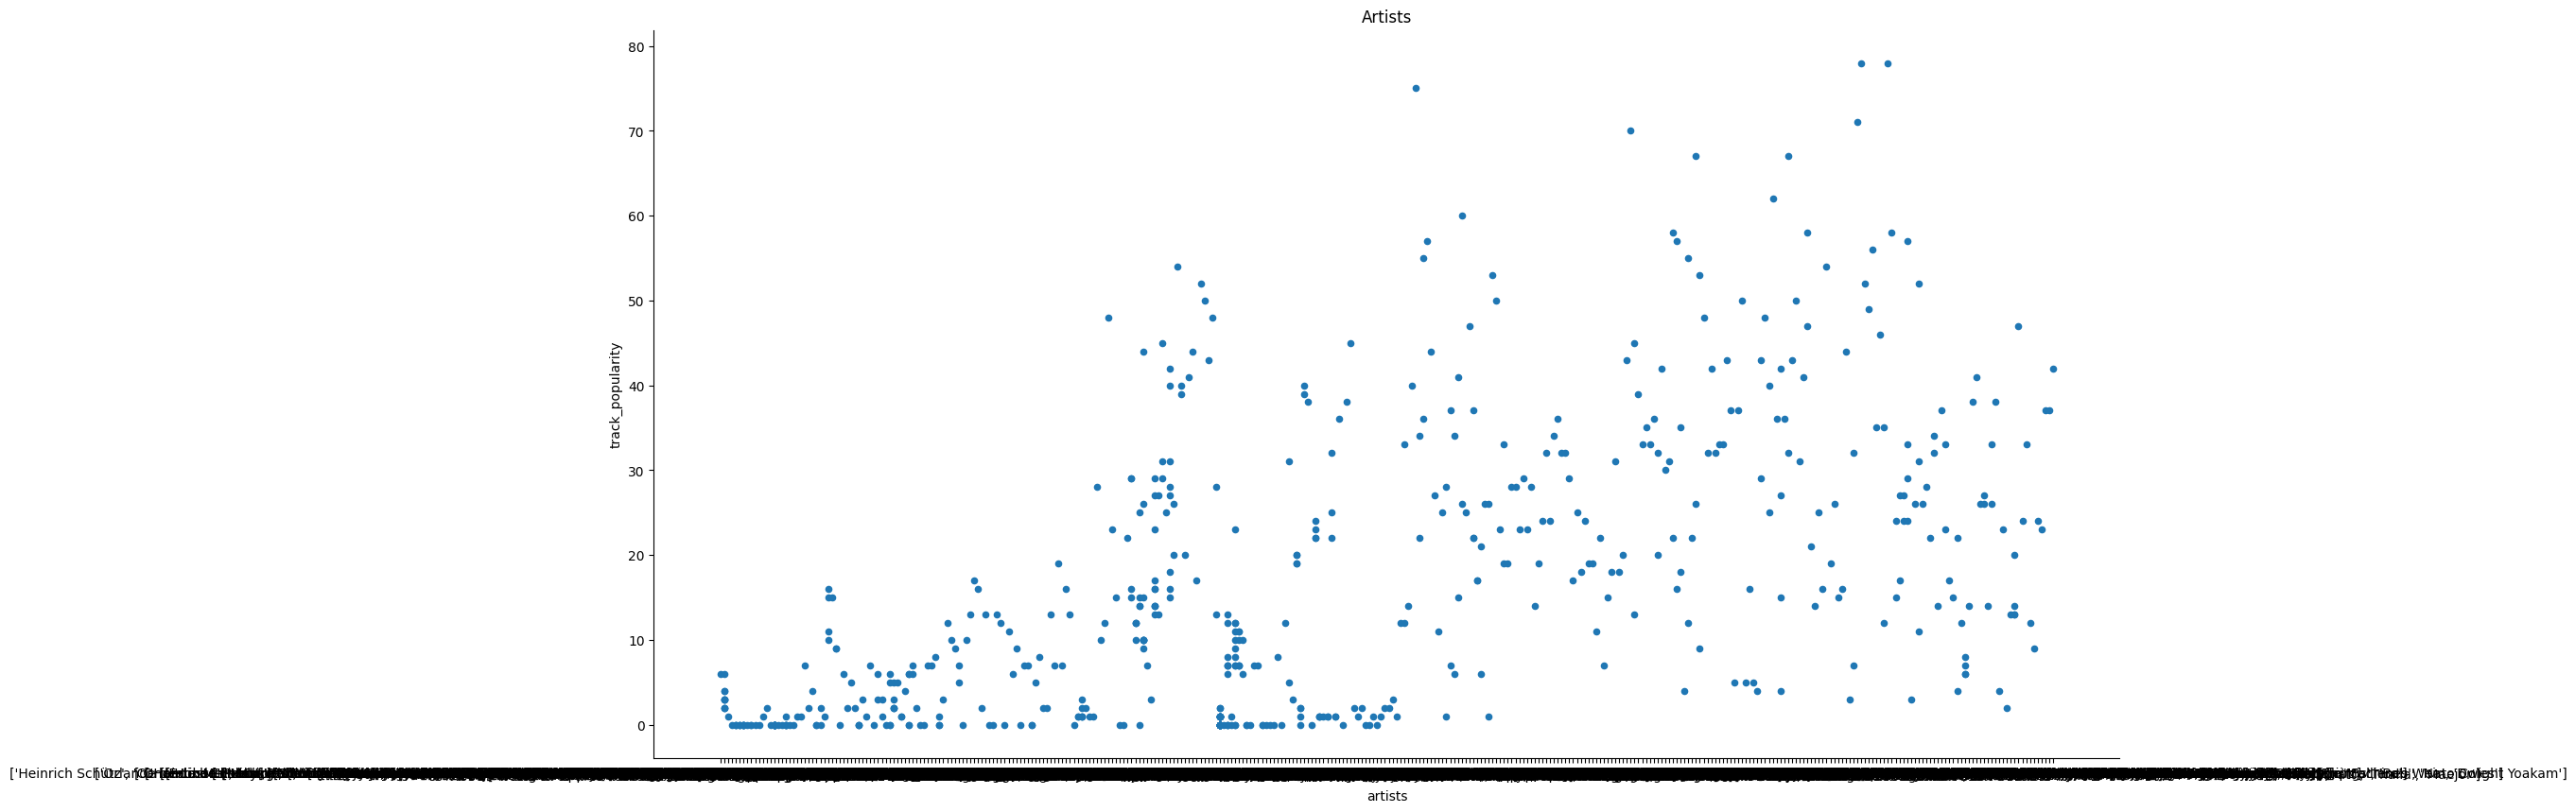

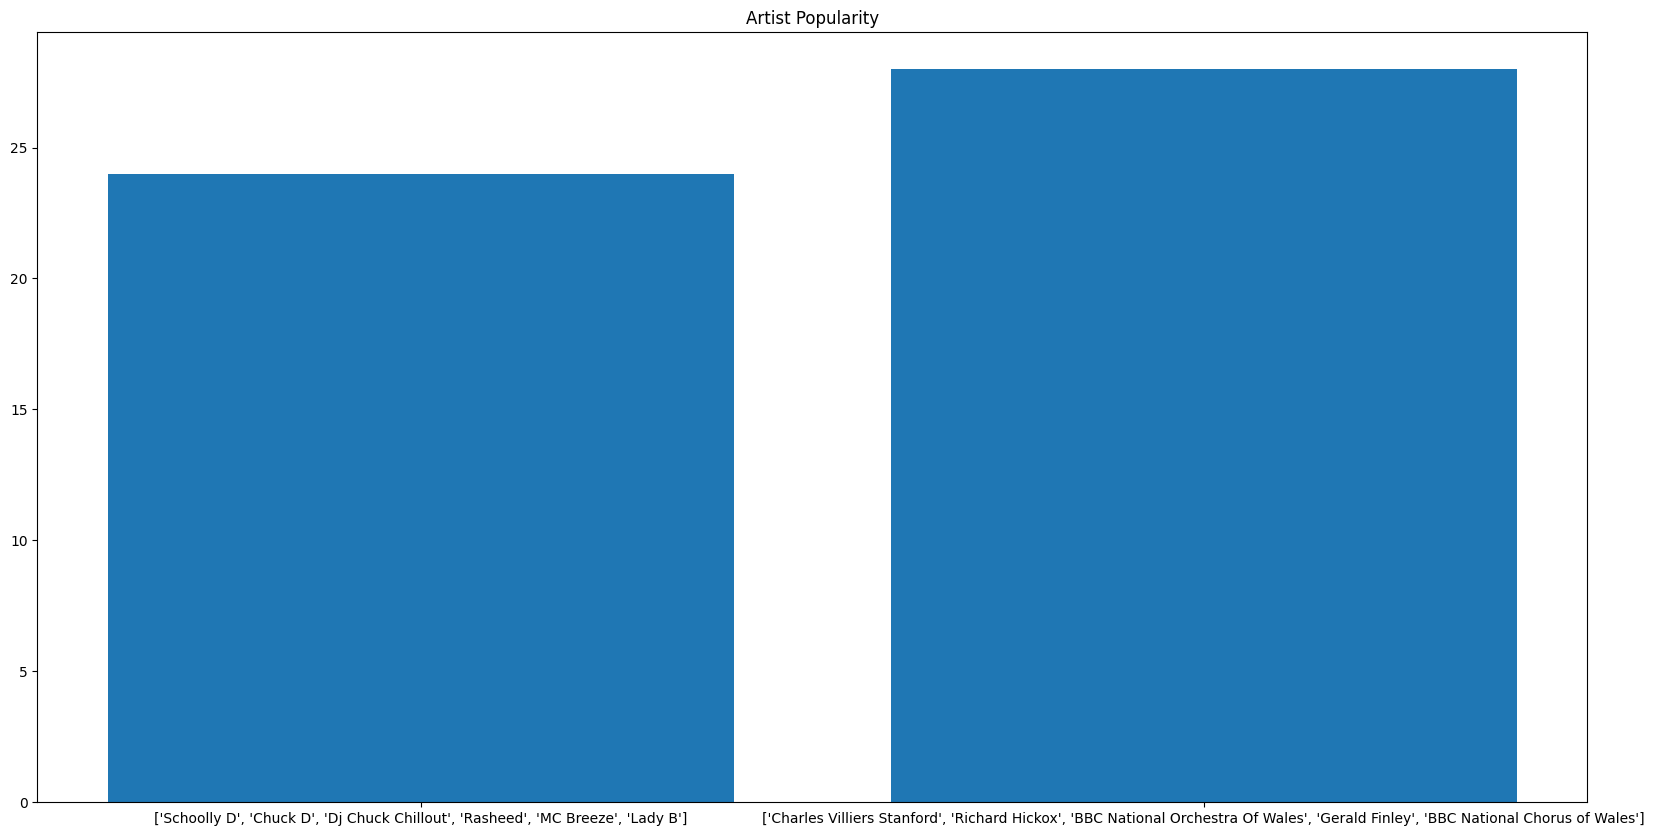

In [4]:
df = pd.DataFrame(data)

df.plot(kind='scatter', x='artists', y='track_popularity', figsize=(20, 10), 
        title='Artists')
plt.gca().spines[['top', 'right']].set_visible(False)

x1 = df['artists']
y1 = df['artist_popularity']
plt.figure(figsize =(20, 10))
plt.bar(x1[0:10], y1[0:10])
plt.title('Artist Popularity')
plt.show()

Select Fields for data processing

In [5]:
numeric_features = ['artist_popularity','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
                    'loudness', 'speechiness', 'tempo', 'track_popularity', 'followers', 'album_popularity', 
                    'instrumentalness']
categorical_features = ['artists','label','artist_genres'] 

X_categorical = df[categorical_features]
X_numeric = df[numeric_features]

Prepare the Data for Processing

In [6]:
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

label_encoders = {}
X_categorical_encoded = pd.DataFrame()

for feature in categorical_features:
    label_encoder = LabelEncoder()
    X_categorical_encoded[feature] = label_encoder.fit_transform(df[feature])
    label_encoders[feature] = label_encoder

Split the data

In [7]:
X = pd.concat([pd.DataFrame(X_numeric_scaled, columns=numeric_features), X_categorical_encoded], axis=1)
y = df['artist_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Construct the Input layer

In [8]:
# Constructing the input
x = np.column_stack((X_train.values, y_train.values)) 
y = y_train.values

Build and execute the model.

In [9]:
# Defining the model
model = keras.Sequential([
	keras.layers.Dense(units=X_train.shape[1], activation='sigmoid', input_dim=X_train.shape[1]),
	keras.layers.Dense(10, activation='sigmoid'),
	keras.layers.Dense(5, activation='sigmoid'),
	keras.layers.Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
# model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# fitting the model
h = model.fit(X_train, y_train, epochs=300, verbose=1, validation_data=(X_test, y_test), batch_size=8)


Epoch 1/300
59/59 [==============================] - 2s 7ms/step - loss: 5.8846 - accuracy: 0.0000e+00 - val_loss: -57.4236 - val_accuracy: 0.0000e+00
Epoch 2/300
59/59 [==============================] - 0s 4ms/step - loss: -568.1992 - accuracy: 0.0000e+00 - val_loss: -898.7927 - val_accuracy: 0.0000e+00
Epoch 3/300
59/59 [==============================] - 0s 2ms/step - loss: -919.1102 - accuracy: 0.0000e+00 - val_loss: -898.7927 - val_accuracy: 0.0000e+00
Epoch 4/300
59/59 [==============================] - 0s 5ms/step - loss: -919.1101 - accuracy: 0.0000e+00 - val_loss: -898.7927 - val_accuracy: 0.0000e+00
Epoch 5/300
59/59 [==============================] - 0s 3ms/step - loss: -919.1102 - accuracy: 0.0000e+00 - val_loss: -898.7927 - val_accuracy: 0.0000e+00
Epoch 6/300
59/59 [==============================] - 0s 4ms/step - loss: -919.1102 - accuracy: 0.0000e+00 - val_loss: -898.7927 - val_accuracy: 0.0000e+00
Epoch 7/300
59/59 [==============================] - 0s 5ms/step - loss: -

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 503 (1.96 KB)
Trainable params: 503 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Evaluate the model

In [11]:
score=model.evaluate(X_test, y_test, verbose=0)
print("Test loss:",score[0])
print("Test accuracy",score[1])

Test loss: -898.792724609375
Test accuracy 0.0


Plot the model performance

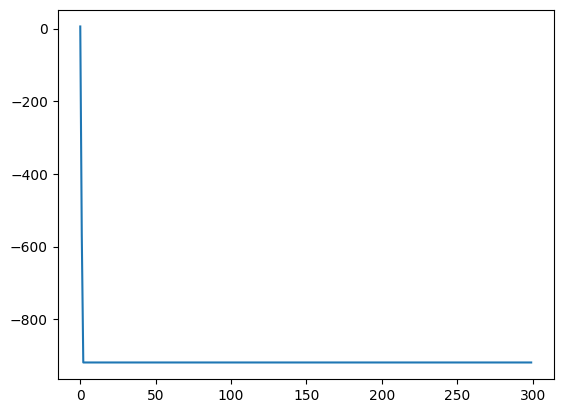

In [14]:
plt.plot(h.history['loss'])